<a href="https://colab.research.google.com/github/MuskanSaini11/Masai_AI_Project_Market_trend/blob/main/Muskan_saini_Stock_market_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Definition & Objective

In [ ]:

1.   Student Name  : Muskan Saini
2.   Student Code  : iitrpr_ai_25010753
3.   Project Track : AI for StockMarket Trend Analysis


Project report : https://docs.google.com/document/d/1sb4zj6vPBf7-gsFtYU_7DpcsxIY1ENlAjESw6P_fFuw/edit?usp=sharing

Slide : https://docs.google.com/presentation/d/1RRO-jFTQwrPnnfv8frY8Gilt0sE-6D1UOW_QIj2jDRI/edit?usp=sharing


Video :https://drive.google.com/file/d/1xvR4auuHyQ3YEbkoXCs5ovaZk_Wo8Ri0/view?usp=sharing

**problem statement :** I want to predict stock price for company based on financial KPI so invester can predict in advance end of day stock price of company .

**Real-world relevance and motivation : **

Analyze stock price data using exploratory data analysis .
Build a regression model that predicts the stock’s closing price based on other market indicators.
Evaluate model performance.
It can be used for stock price analysis.

Dataset used : https://drive.google.com/file/d/16aOmX2cqhBsrN4XViXcz5FNX4jZn7frw/view?usp=sharing

NOTE : for running this notebook , pls download the attached dataset and then upload into colab file

# Data Understanding & Preparation

## Data unzip and import

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
!unzip /content/Stock_market.zip -d my_data

Archive:  /content/Stock_market.zip
replace my_data/Detailed-Financials-Data-Of-4456-NSE-And-BSE-Company-20231230T233228Z-001/Detailed-Financials-Data-Of-4456-NSE-_-BSE-Company/20 Microns Ltd/20 Microns Ltd_Basic_Info.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Create Yearly_Profit_Loss.csv File

This code loops through a directory of financial CSV files ( “Detailed Financial Data of 4456 NSE and BSE Companies”), reads each company’s Yearly_Profit_Loss.csv, reformats it, and combines them all into a single CSV file called Yearly_Profit_Loss.csv.

The final output:
➡️ One combined DataFrame containing yearly profit/loss data for up to 1000 companies.

In [ ]:
count = 0
combined_df = pd.DataFrame()
# The path to the root directory containing all company folders
root_data_path = '/content/my_data/Detailed-Financials-Data-Of-4456-NSE-And-BSE-Company-20231230T233228Z-001/Detailed-Financials-Data-Of-4456-NSE-_-BSE-Company'

for dirpath, dirnames, filenames in os.walk(root_data_path):
    # Check if 'Yearly_Profit_Loss.csv' exists in the current directory (dirpath)
    if "Yearly_Profit_Loss.csv" in filenames:
        file_path = os.path.join(dirpath, "Yearly_Profit_Loss.csv")
        try:
            df = pd.read_csv(file_path, header=0)
            df = df.rename(columns={'Unnamed: 0':'Years'})

            df = df.transpose()
            df.columns= df.iloc[0]
            df = df[1:]

            # Extract company name from the directory path (the last component of dirpath)
            company_name = os.path.basename(dirpath)
            df.insert(0,"Organization", company_name)
            combined_df = pd.concat([combined_df, df])

            count += 1
            print(f"Processed {count} companies.")
            if count == 1000:
                break # Break from the current os.walk iteration if 1000 companies are processed
        except Exception as e:
            print(f"Error processing {file_path}: {e}")

    if count == 1000: # This check is outside the inner conditional block to ensure os.walk stops
        break # This break corresponds to the 'for dirpath' loop, stopping os.walk early.

combined_df.to_csv("Yearly_Profit_Loss.csv", mode='w')

Processed 1 companies.
Processed 2 companies.
Processed 3 companies.
Processed 4 companies.
Processed 5 companies.
Processed 6 companies.
Processed 7 companies.
Processed 8 companies.
Processed 9 companies.
Processed 10 companies.
Processed 11 companies.
Processed 12 companies.
Processed 13 companies.
Processed 14 companies.
Processed 15 companies.
Processed 16 companies.
Processed 17 companies.
Processed 18 companies.
Processed 19 companies.
Processed 20 companies.
Processed 21 companies.
Processed 22 companies.
Processed 23 companies.
Processed 24 companies.
Processed 25 companies.
Processed 26 companies.
Processed 27 companies.
Processed 28 companies.
Processed 29 companies.
Processed 30 companies.
Processed 31 companies.
Processed 32 companies.
Processed 33 companies.
Processed 34 companies.
Processed 35 companies.
Processed 36 companies.
Processed 37 companies.
Processed 38 companies.
Processed 39 companies.
Processed 40 companies.
Processed 41 companies.
Processed 42 companies.
P

## Create Company_Details.csv File

This code collects basic company information (from many folders) inside the dataset “**Detailed Financial Data of 4456 NSE and BSE Companies**”.

Each company folder contains a file called Basic_Info.csv. The script finds all of those, reads them, and combines them into one master CSV called Company_Details.csv.
After running this, we'll have a single file that lists basic info for all companies.

In [ ]:
#Get Company Basic Info for all the companies present in subfolder of detailed-financial-data-of-4456-nse-and-bse-company datasets

combined_df = pd.DataFrame()
processed_companies_count = 0
for dirpath, dirnames, filenames in os.walk('/content/my_data/Detailed-Financials-Data-Of-4456-NSE-And-BSE-Company-20231230T233228Z-001/Detailed-Financials-Data-Of-4456-NSE-_-BSE-Company'):
    for filename in filenames:
        if filename[-14:] == "Basic_Info.csv":
            file_path = os.path.join(dirpath, filename)
            try:
                df = pd.read_csv(file_path, header=0)
                combined_df = pd.concat([combined_df, df])
                processed_companies_count += 1
                print(f"Processed basic info for {processed_companies_count} companies.")
            except Exception as e:
                print(f"Error processing {file_path}: {e}")
combined_df.to_csv("Company_Details.csv", mode='w')
print(f"Total {processed_companies_count} company basic info files processed and saved to Company_Details.csv.")

Processed basic info for 1 companies.
Processed basic info for 2 companies.
Processed basic info for 3 companies.
Processed basic info for 4 companies.
Processed basic info for 5 companies.
Processed basic info for 6 companies.
Processed basic info for 7 companies.
Processed basic info for 8 companies.
Processed basic info for 9 companies.
Processed basic info for 10 companies.
Processed basic info for 11 companies.
Processed basic info for 12 companies.
Processed basic info for 13 companies.
Processed basic info for 14 companies.
Processed basic info for 15 companies.
Processed basic info for 16 companies.
Processed basic info for 17 companies.
Processed basic info for 18 companies.
Processed basic info for 19 companies.
Processed basic info for 20 companies.
Processed basic info for 21 companies.
Processed basic info for 22 companies.
Processed basic info for 23 companies.
Processed basic info for 24 companies.
Processed basic info for 25 companies.
Processed basic info for 26 compan

### Company Basic Information — Dataset Description

This section provides an overview of the basic company information collected from the Basic_Info.csv files for all listed companies in the dataset.
Each record represents a single company with key financial and market indicators.

### 📋Column Details

- `Company_name`: Name of the company.
- `Sector`: Industry sector of the company.
- `BSE`: Bombay Stock Exchange code.
- `NSE`: National Stock Exchange code.
- `Market Cap`: Market capitalization of the company.
- `Current Price`: Current stock price.
- `High/Low`: Highest and lowest stock prices.
- `Stock P/E`: Price to earnings ratio.
- `Book Value`: Book value per share. Per-share value of a company's equity available to common shareholders. It is calculated by dividing the equity available to common shareholders by the number of outstanding shares.
- `Dividend Yield`: Dividend yield percentage.
- `ROCE`: Return on capital employed percentage.
- `ROE`: Return on equity percentage.
- `Face Value`: Face value of the stock.
- `Price to Sales`: Price to sales ratio.
- `Sales growth (1, 3, 5, 7, 10 years)`: Sales growth percentage over different time periods.
- `Profit growth (1, 3, 5, 7, 10 years)`: Profit growth percentage over different time periods.
- `EPS`: Earnings per share.
- `EPS last year`: Earnings per share in the last year.
- `Debt (1, 3, 5, 7, 10 years)`: Debt of the company over different time periods.

## Data Preprocessing & Feature Engineering

These functions are utility tools to help with data cleaning and preprocessing, specifically for **handling outliers** and **missing values** in your dataset.
They are used as part of exploratory data analysis (EDA) and data preparation before modeling. we are checking here outlier and null and replacing them with Median value

In [ ]:
#Define Functions

def detect_outliers(dataframe_variable, variable_name):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=dataframe_variable, palette="Set2")
    plt.title("Outliers Detection using Boxplot", fontsize=12)
    plt.xlabel(variable_name, fontsize=10)
    plt.ylabel("Values", fontsize=8)
    plt.tick_params(axis='y', labelsize=8)
    plt.show()

def update_outlies(dataframe, dataframe_variable_name, threshold):
    median = dataframe[dataframe_variable_name].median()
    print(f"Before Updating Outliers: Median of {dataframe_variable_name} - {median}, Mean - {dataframe[dataframe_variable_name].mean()}")

    #Replace Outliers with median
    dataframe[dataframe_variable_name] = dataframe[dataframe_variable_name].apply(lambda x: median if x > threshold else x)
    # print(f"Unique values in {dataframe_variable_name} - {dataframe[dataframe_variable_name].unique()}")

    median = dataframe[dataframe_variable_name].median()
    print(f"After Updating Outliers: Median of {dataframe_variable_name} - {median}, Mean - {df_data['Stock P/E'].mean()}")
    return dataframe

def update_null_values(dataframe, dataframe_variable_name):
    dataframe[dataframe_variable_name] = dataframe[dataframe_variable_name].fillna(dataframe[dataframe_variable_name].mean())
    return dataframe

The code loads the combined company dataset from Company_Details.csv, removes redundant index columns (Unnamed: 0 and Unnamed: 0.1), and drops columns that are either heavily missing (more than 45% null values, such as Profit growth 7Years and Sales growth 10Years) or less relevant for analysis (like individual BSE/NSE codes and multi-year debt/sales/profit growth columns).

After cleaning, generates a statistical summary of the remaining numerical features, providing key insights into their distributions, central tendencies, and potential outliers, which serves as a starting point for further exploratory data analysis and preprocessing.

In [ ]:
df_data = pd.read_csv("/content/Company_Details.csv", header=0)



print(df_data.columns) # Added to inspect columns

#BSE NSE unique codes
#more than 45% values are missing from Profit growth 7Years, Sales growth 10Years, Profit growth 10Years
df_data = df_data.drop(['BSE', 'NSE', 'Profit growth 7Years', 'Sales growth 10Years', 'Profit growth 10Years', 'Debt 3Years back', 'Debt 5Years back', 'Debt 7Years back', 'Debt 10Years back', 'Sales growth 3Years', 'Sales growth 5Years', 'Sales growth 7Years', 'Sales growth 10Years', 'Profit growth 3Years', 'Profit growth 5Years', 'Profit growth 7Years', 'Profit growth 10Years' ], axis=1)
df_data.describe()

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company_name', 'Sector', 'BSE', 'NSE',
       'Market Cap', 'Current Price', 'High / Low', 'Stock P/E', 'Book Value',
       'Dividend Yield', 'ROCE', 'ROE', 'Face Value', 'Price to Sales',
       'Sales growth', 'Sales growth 3Years', 'Sales growth 5Years',
       'Sales growth 7Years', 'Sales growth 10Years', 'Profit growth',
       'Profit growth 3Years', 'Profit growth 5Years', 'Profit growth 7Years',
       'Profit growth 10Years', 'EPS', 'EPS last year', 'Debt',
       'Debt 3Years back', 'Debt 5Years back', 'Debt 7Years back',
       'Debt 10Years back'],
      dtype='object')


,Unnamed: 0.1,Unnamed: 0,Market Cap,Current Price,Stock P/E,Book Value,Dividend Yield,ROCE,ROE,Face Value,Price to Sales,Sales growth,Profit growth,EPS,EPS last year,Debt
count,4492.0,4492.0,4.492000e+03,4492.000000,3295.00000,4370.000000,4472.000000,4311.000000,4024.000000,4472.000000,4203.000000,4.227000e+03,4.426000e+03,4440.000000,4441.000000,4.489000e+03
mean,0.0,0.0,8.153036e+03,503.943805,78.76125,177.242259,0.543412,3.934758,8.495527,8.548077,21.565391,1.798183e+03,8.436238e+02,19.798426,18.155116,6.428418e+03
std,0.0,0.0,5.286523e+04,2570.297782,435.06902,1189.163597,15.176600,357.332142,88.060180,26.650111,243.225930,1.015324e+05,4.731135e+04,206.353997,192.078534,9.770168e+04
min,0.0,0.0,1.030000e+00,0.260000,0.03000,-3952.000000,0.000000,-23000.000000,-1840.000000,1.000000,0.000000,-7.470000e+04,-7.270000e+04,-670.000000,-609.000000,0.000000e+00
25%,0.0,0.0,2.990000e+01,22.875000,16.80000,10.600000,0.000000,1.420000,0.630000,5.000000,0.910000,-1.180000e+01,-4.255000e+01,-0.030000,0.000000,1.480000e+00
50%,0.0,0.0,1.675000e+02,89.050000,30.20000,37.500000,0.000000,8.540000,7.385000,10.000000,2.270000,7.770000e+00,1.540000e+01,2.300000,2.070000,2.140000e+01
75%,0.0,0.0,1.466250e+03,348.250000,56.60000,118.000000,0.270000,17.200000,16.225000,10.000000,6.040000,2.860000e+01,8.337500e+01,12.100000,11.400000,1.480000e+02
max,0.0,0.0,1.748895e+06,129579.000000,20436.00000,37328.000000,1013.000000,2684.000000,4180.000000,1000.000000,11298.000000,6.586500e+06,3.124415e+06,10930.000000,10930.000000,4.989687e+06


In [ ]:
df_data.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Company_name,0
Sector,0
Market Cap,0
Current Price,0
High / Low,0
Stock P/E,1197
Book Value,122
Dividend Yield,20


/tmp/ipython-input-1607146260.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe_variable, palette="Set2")


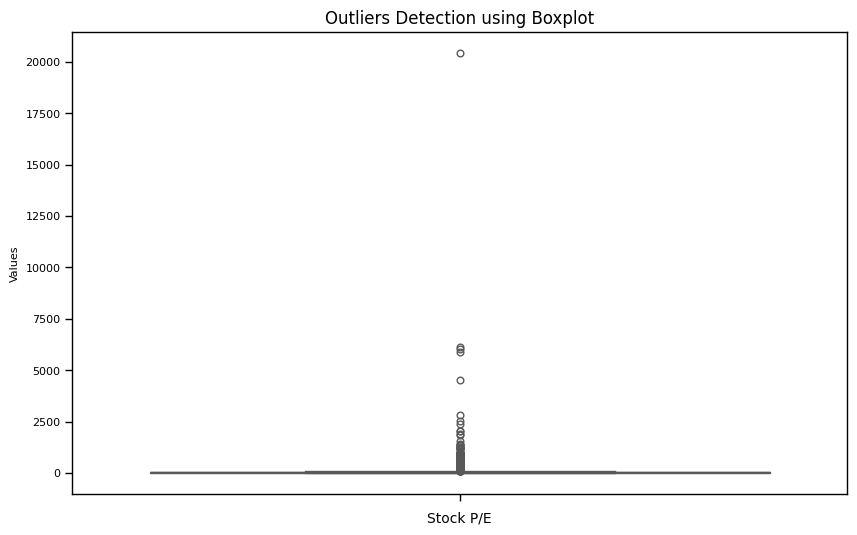

Before Updating Outliers: Median of Stock P/E - 30.2, Mean - 78.76125037936268
After Updating Outliers: Median of Stock P/E - 30.2, Mean - 62.22407283763278


In [ ]:
detect_outliers(df_data['Stock P/E'], 'Stock P/E')

df_data = update_outlies(df_data,'Stock P/E', 2000)

df_data = update_null_values(df_data,'Stock P/E')

/tmp/ipython-input-1607146260.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe_variable, palette="Set2")


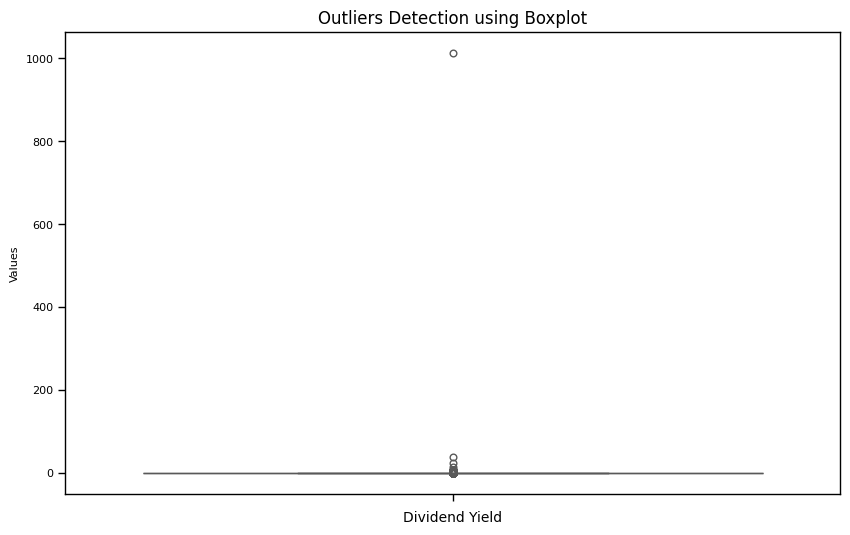

Before Updating Outliers: Median of Dividend Yield - 0.0, Mean - 0.5434123434704831
After Updating Outliers: Median of Dividend Yield - 0.0, Mean - 62.22407283763278


In [ ]:
detect_outliers(df_data['Dividend Yield'], 'Dividend Yield')

df_data = update_outlies(df_data,'Dividend Yield', 5)

df_data = update_null_values(df_data,'Dividend Yield')

/tmp/ipython-input-1607146260.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe_variable, palette="Set2")


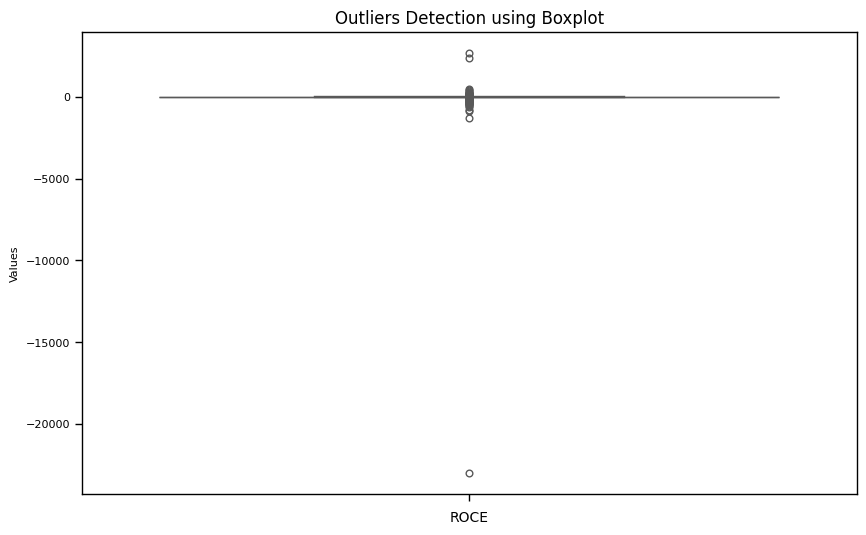

Unique values in Book Value [15.4  12.2    nan ...  2.27  9.24 -1.53]


In [ ]:
detect_outliers(df_data['ROCE'], 'ROCE')
median = df_data['ROCE'].median()
df_data['ROCE'] = df_data['ROCE'].apply(lambda x: median if x > 200 else ( median if x < -200 else x ))
print(f"Unique values in Book Value {df_data['ROCE'].unique()}")

df_data = update_null_values(df_data,'ROCE')

/tmp/ipython-input-1607146260.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe_variable, palette="Set2")


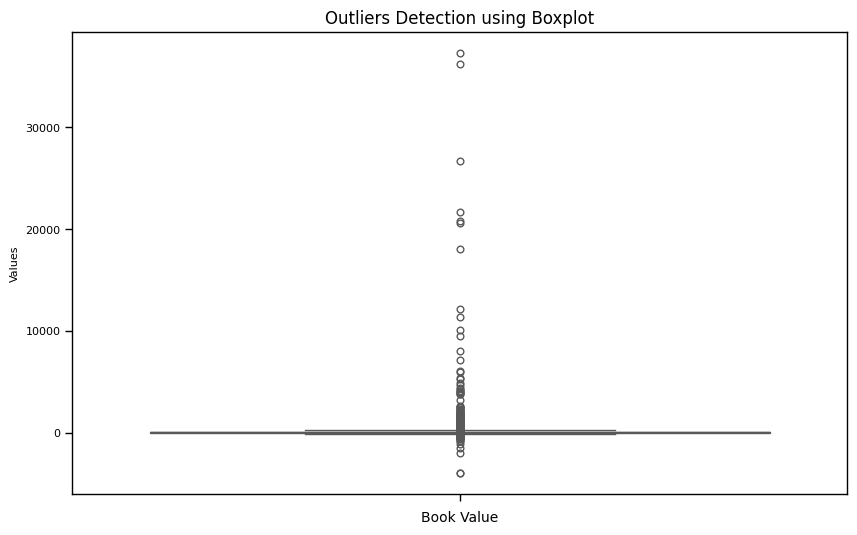

Unique values in Book Value [  76.8    63.   -205.   ...  236.    920.      6.24]


In [ ]:
detect_outliers(df_data['Book Value'], 'Book Value')
median = df_data['Book Value'].median()
df_data["Book Value"] = df_data["Book Value"].apply(lambda x: median if x > 3000 else ( median if x < -300 else x ))
print(f"Unique values in Book Value {df_data['Book Value'].unique()}")

df_data = update_null_values(df_data,'Book Value')

/tmp/ipython-input-1607146260.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe_variable, palette="Set2")


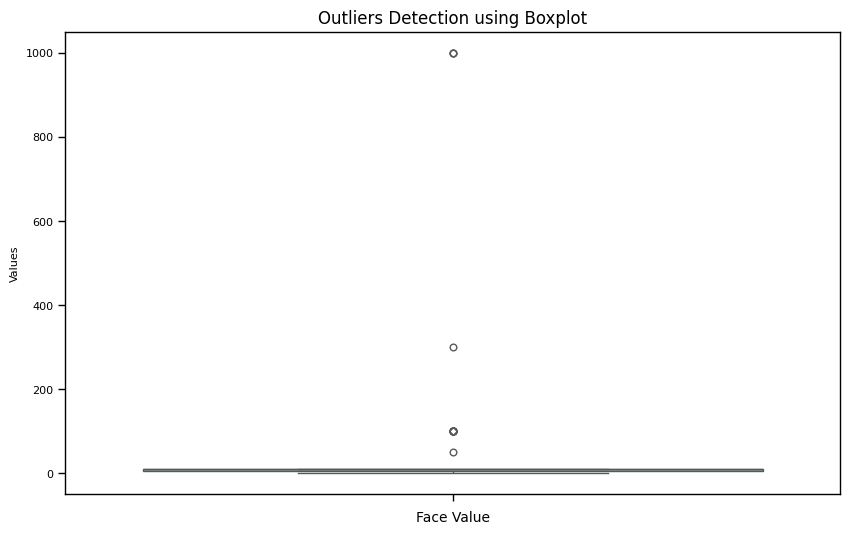

Before Updating Outliers: Median of Face Value - 10.0, Mean - 8.548076923076923
After Updating Outliers: Median of Face Value - 10.0, Mean - 62.22407283763278


In [ ]:
detect_outliers(df_data['Face Value'], 'Face Value')
df_data = update_outlies(df_data,'Face Value', 60)
df_data = update_null_values(df_data,'Face Value')

/tmp/ipython-input-1607146260.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe_variable, palette="Set2")


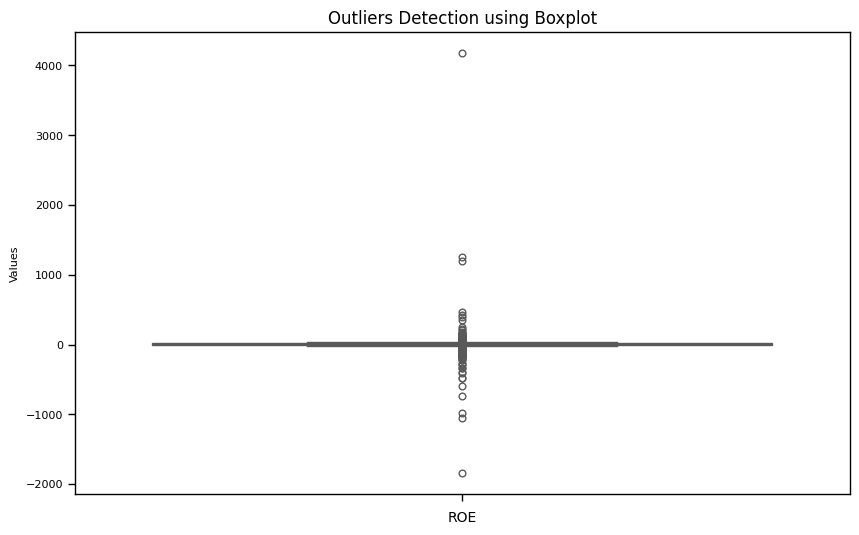

Unique values in Book Value [11.8  11.9    nan ... -0.85 -2.67  5.74]


In [ ]:
detect_outliers(df_data['ROE'],'ROE')
median = df_data['ROE'].median()
df_data['ROE'] = df_data['ROE'].apply(lambda x: median if x > 200 else ( median if x < -200 else x ))
print(f"Unique values in Book Value {df_data['ROE'].unique()}")

df_data = update_null_values(df_data,'ROE')

/tmp/ipython-input-1607146260.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe_variable, palette="Set2")


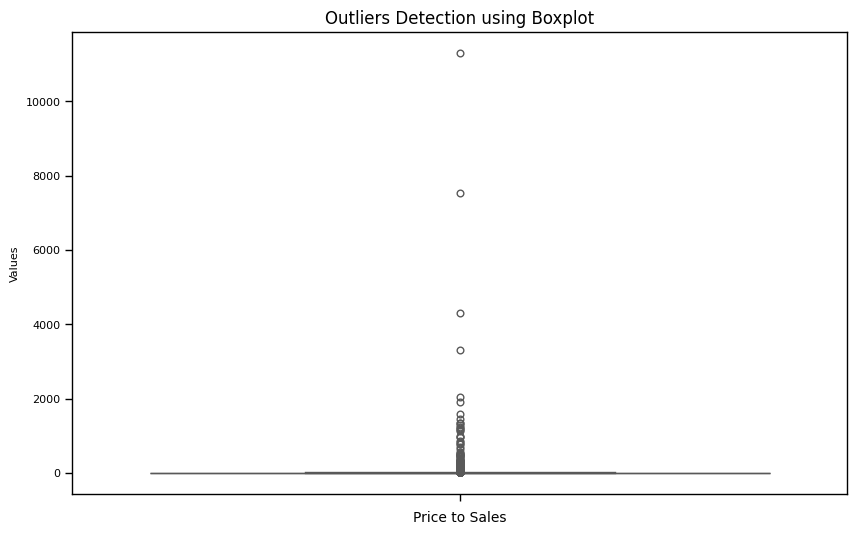

Before Updating Outliers: Median of Price to Sales - 2.27, Mean - 21.56539138710445
After Updating Outliers: Median of Price to Sales - 2.27, Mean - 62.22407283763278


In [ ]:
detect_outliers(df_data['Price to Sales'], 'Price to Sales')

df_data = update_outlies(df_data,'Price to Sales', 600)

df_data = update_null_values(df_data,'Price to Sales')

/tmp/ipython-input-1607146260.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe_variable, palette="Set2")


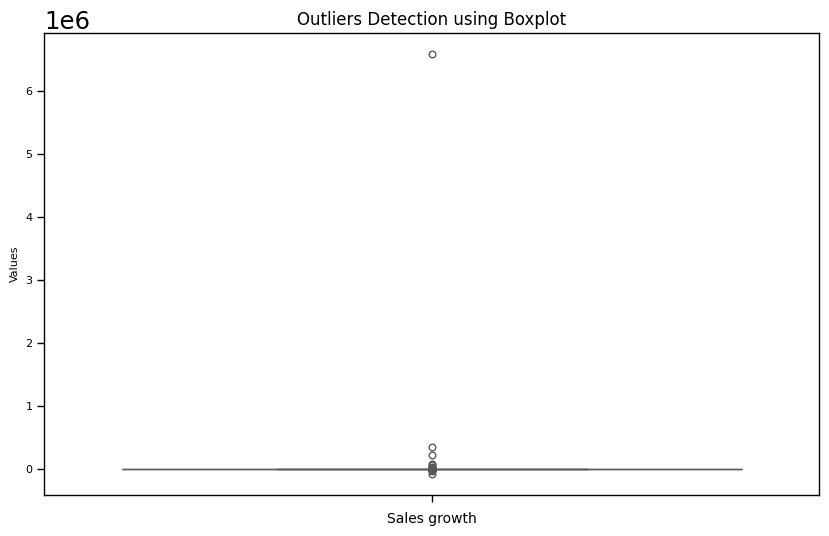

In [ ]:
detect_outliers(df_data['Sales growth'], 'Sales growth')
df_data = update_null_values(df_data,'Sales growth')

/tmp/ipython-input-1607146260.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe_variable, palette="Set2")


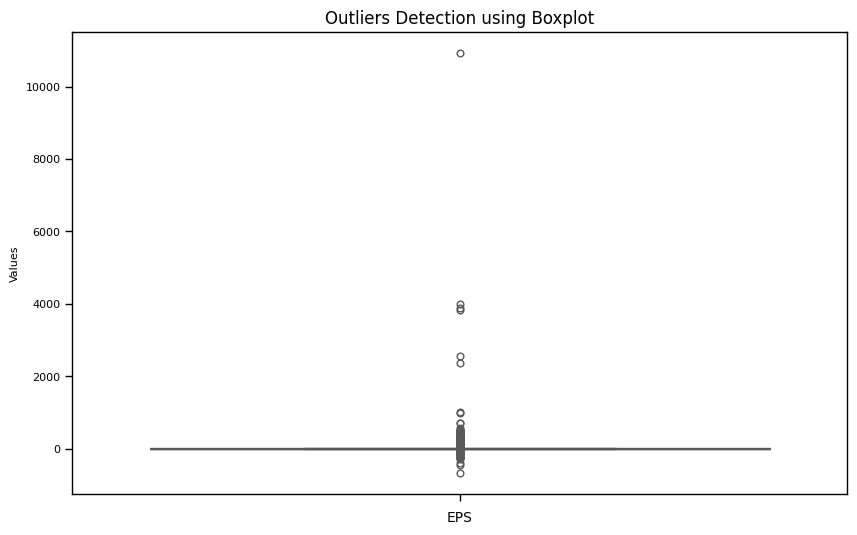

Unique values in Book Value [  0.61   7.92 -15.2  ...   3.66  44.5   -2.53]


In [ ]:
detect_outliers(df_data['EPS'],'EPS')
median = df_data['EPS'].median()
df_data['EPS'] = df_data['EPS'].apply(lambda x: median if x > 2000 else ( median if x < -100 else x ))
print(f"Unique values in Book Value {df_data['EPS'].unique()}")

df_data = update_null_values(df_data,'EPS')

/tmp/ipython-input-1607146260.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataframe_variable, palette="Set2")


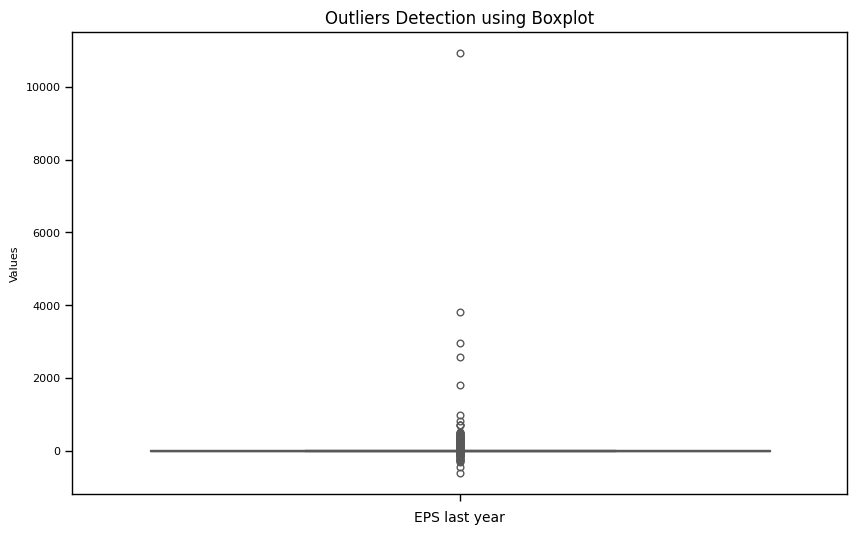

Unique values in Book Value [  8.78   7.12 -15.3  ...   3.12  -5.17 139.  ]


In [ ]:
detect_outliers(df_data['EPS last year'], 'EPS last year')
median =df_data['EPS last year'].median()
df_data['EPS last year'] = df_data['EPS last year'].apply(lambda x: median if x > 2000 else ( median if x < -50 else x ))
print(f"Unique values in Book Value {df_data['EPS last year'].unique()}")

df_data = update_null_values(df_data,'EPS last year')

In [ ]:
df_data = update_null_values(df_data,'Profit growth')
df_data = update_null_values(df_data,'Debt')
df_data.describe()

,Unnamed: 0.1,Unnamed: 0,Market Cap,Current Price,Stock P/E,Book Value,Dividend Yield,ROCE,ROE,Face Value,Price to Sales,Sales growth,Profit growth,EPS,EPS last year,Debt
count,4492.0,4492.0,4.492000e+03,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4.492000e+03,4.492000e+03,4492.000000,4492.000000,4.492000e+03
mean,0.0,0.0,8.153036e+03,503.943805,62.224073,112.076011,0.280673,9.740167,8.589313,7.637970,9.488244,1.798183e+03,8.436238e+02,14.612502,15.015542,6.428418e+03
std,0.0,0.0,5.286523e+04,2570.297782,112.041805,230.829973,0.629414,20.492429,21.765044,3.733745,34.345552,9.849127e+04,4.696242e+04,49.940678,54.900946,9.766905e+04
min,0.0,0.0,1.030000e+00,0.260000,0.030000,-295.000000,0.000000,-198.000000,-184.000000,1.000000,0.000000,-7.470000e+04,-7.270000e+04,-99.900000,-49.700000,0.000000e+00
25%,0.0,0.0,2.990000e+01,22.875000,20.800000,11.175000,0.000000,1.880000,1.307500,5.000000,0.970000,-1.020000e+01,-4.065000e+01,-0.010000,0.020000,1.487500e+00
50%,0.0,0.0,1.675000e+02,89.050000,46.350000,38.650000,0.000000,9.015000,8.589313,10.000000,2.520000,9.660000e+00,1.660000e+01,2.375000,2.215000,2.140000e+01
75%,0.0,0.0,1.466250e+03,348.250000,62.224073,112.076011,0.270000,16.600000,15.000000,10.000000,7.412500,3.772500e+01,8.882500e+01,12.800000,11.900000,1.480000e+02
max,0.0,0.0,1.748895e+06,129579.000000,1882.000000,2604.000000,4.680000,200.000000,177.000000,50.000000,564.000000,6.586500e+06,3.124415e+06,1014.000000,1813.000000,4.989687e+06


## Checking NULL in Data

In [ ]:
df_data.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Company_name,0
Sector,0
Market Cap,0
Current Price,0
High / Low,0
Stock P/E,0
Book Value,0
Dividend Yield,0


## Correlation Matrix

Text(0.5, 1.0, 'Correlation between features')

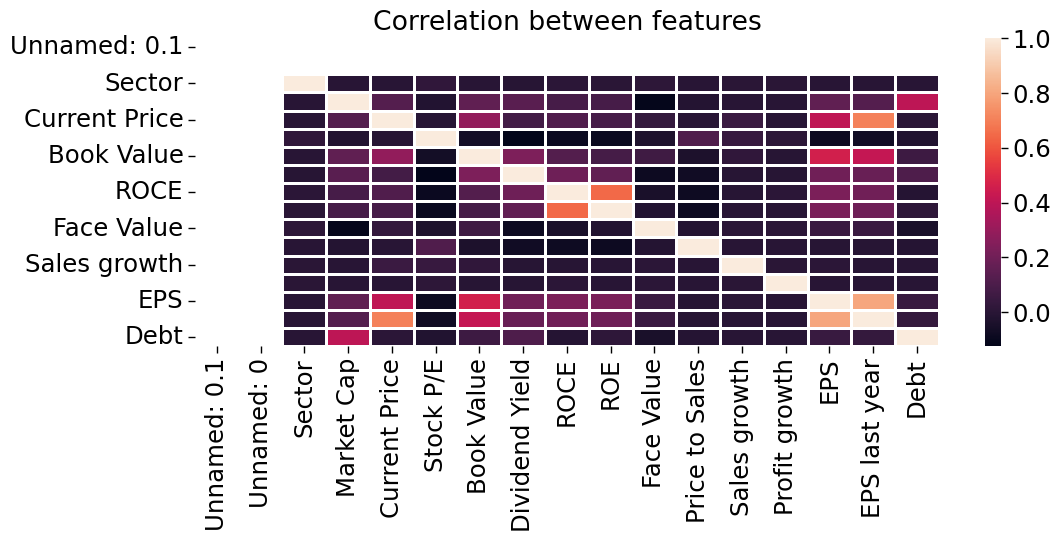

In [ ]:
df_data.Sector.nunique()
df_data["Sector"]=df.Sector.astype('category')
df_data["Sector"] = df_data["Sector"].cat.codes
df_data["Company_name"]=df.Company_name.astype('category')
df_data = df_data.rename(columns={'High / Low': 'highlow'})
df_data['highlow']=df_data.highlow.astype('category')
df_data["highlow"] = df_data["highlow"].cat.codes

temp_df = df_data

del temp_df["Company_name"]
del temp_df["highlow"]

# #Create correlation matrix
df_corr_matrix= df_data.corr()
fig, axes = plt.subplots(figsize=(12,4))
sns.set_context(context="paper", font_scale=2)
sns.heatmap(df_corr_matrix, linecolor="white", linewidth=1)
axes.set_title("Correlation between features")

# Model Training

# ML Approach

The dataset was prepared by separating the target variable Current Price from the feature set and splitting the data into training (95%) and testing (5%) subsets.
* Using Linear Regression first
* Using Polynomial Regression then
* A Random Forest Regressor with was trained on the training data to predict stock prices based on company financials and market indicators.
* Model performance was evaluated using the R-squared (R²) metric, which quantifies the proportion of variance in stock prices explained by the model.


## Linear Regressoin for Predicting Stock Price

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict using Linear Regression
y_pred_lr = lr_model.predict(X_test)

# Evaluate the R-Squared
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Variance explained by Linear Regression (R-Squared) = {r2_lr}")

Variance explained by Linear Regression (R-Squared) = -0.44092044868779734


## Polynomial Regressoin for Predicting Stock Price

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

# 1. Define the degree (start with 2 or 3 to avoid overfitting)
degree = 2

# 2. Create a Pipeline: This first transforms data to polynomial features, then fits linear regression
poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('linear', LinearRegression())
])

# 3. Train the model
poly_model.fit(X_train, y_train)

# 4. Predict and evaluate
y_pred_poly = poly_model.predict(X_test)

r2_poly = r2_score(y_test, y_pred_poly)
print(f"Variance explained by Polynomial Regression (Degree {degree}) = {r2_poly}")

Variance explained by Polynomial Regression (Degree 2) = -18.89208065525691


## Radnom Forest Regressoin for Predicting Stock Price

In [ ]:
target = temp_df["Current Price"]

del temp_df["Current Price"]
variables = temp_df

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(variables, target, test_size=0.05, random_state=0)

# Initialize and train the model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred = regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"Variance explained by the model (R-Squared) = {r2}")

Variance explained by the model (R-Squared) = 0.9122959191665939


# Model Evaluation

Liner Regression
* The resulting R² value of -0.44 indicates that the model not captures variability in stock prices, demonstrating bad predictive capability.

Polynomial Regression
* The resulting R² value of -0.18 indicates that the model not captures variability in stock prices, demonstrating bad predictive capability.

Random Forest
* The resulting R² value of 0.91 indicates that the model captures approximately 91% of the variability in stock prices, demonstrating strong predictive capability.

# Summary